In [1]:
import sys
sys.path.append("../src")
import pandas as pd
from eda_utils import *

# Optional: if using sensor thresholds
from data_generation import SensorSpec 

## Mud Pump - data analysis

In [2]:
df = pd.read_csv("../data/mud_pump.csv", parse_dates=["timestamp"])
df.head()

,timestamp,equipment_id,pressure_psi,flow_rate_lpm,pump_temp_C
0,2024-01-01 00:00:00,Mud Pump,121.218868,88.773216,57.602712
1,2024-01-01 00:01:00,Mud Pump,115.840064,85.817854,57.716213
2,2024-01-01 00:02:00,Mud Pump,123.001805,88.479023,60.513820
3,2024-01-01 00:03:00,Mud Pump,123.762259,89.132720,56.510929
4,2024-01-01 00:04:00,Mud Pump,112.195859,91.516895,55.699145


### Basic Summary

In [3]:
basic_summary(df)

###  Dataset Shape

,Metric,Value
0,Rows,262079
1,Columns,5


### Data Types & Missing Values

,Data Type,Non-Null Count,Missing Count,Missing (%)
timestamp,datetime64[ns],262079,0,0.00
equipment_id,object,262079,0,0.00
pressure_psi,float64,260740,1339,0.51
flow_rate_lpm,float64,260775,1304,0.50
pump_temp_C,float64,260799,1280,0.49


### Descriptive Statistics (Numerical Columns Only)

,count,mean,std,min,25%,50%,75%,max,missing
pressure_psi,260740.0,119.997,4.008,84.714,117.300,119.993,122.694,140.029,1339
flow_rate_lpm,260775.0,89.995,3.016,46.328,87.981,89.993,92.024,104.019,1304
pump_temp_C,260799.0,58.086,2.391,48.346,56.667,58.014,59.375,91.905,1280


##  Dataset Summary Insights

- **Dataset Size**:  
  The dataset contains **262,079 rows** and **5 columns**, representing time-series sensor data for the Mud Pump equipment.

- **Missing Data**:  
  Each of the three key sensors has approximately **0.5% missing values**:
  - `pressure_psi`: 1,339 missing
  - `flow_rate_lpm`: 1,304 missing
  - `pump_temp_C`: 1,280 missing  
  These missing values may require imputation or exclusion during analysis.

- **Sensor Statistics Overview**:
  - **Pressure (psi)**:  
    Mean = `120`, Std = `4.0`, Min = `84.7`, Max = `140.0`  
    - Some low values suggest possible pressure drop anomalies.
  
  - **Flow Rate (L/min)**:  
    Mean = `90`, Std = `3.0`, Min = `46.3`, Max = `104.0`  
    - Sudden drops may signal flow anomalies or mesh clogging.

  - **Pump Temperature (°C)**:  
    Mean = `58.1`, Std = `2.4`, Min = `48.3`, Max = `91.9`  
    - Higher-end values could indicate overheating or drift.

---


### Correlation Matrix

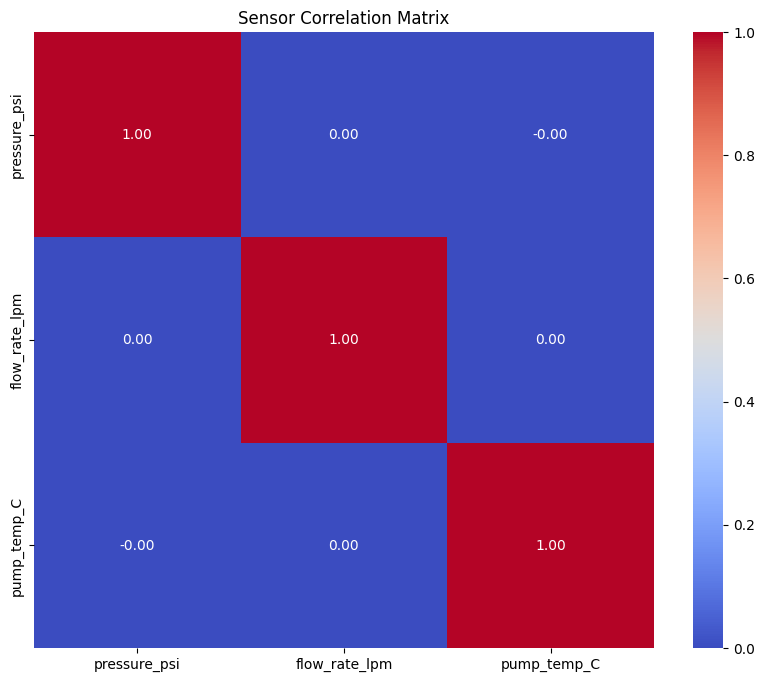

In [4]:
plot_correlation(df)

The sensor correlation matrix shows no significant correlation among pressure_psi, flow_rate_lpm, and pump_temp_C, indicating each sensor operates independently.

### Time Series Plots

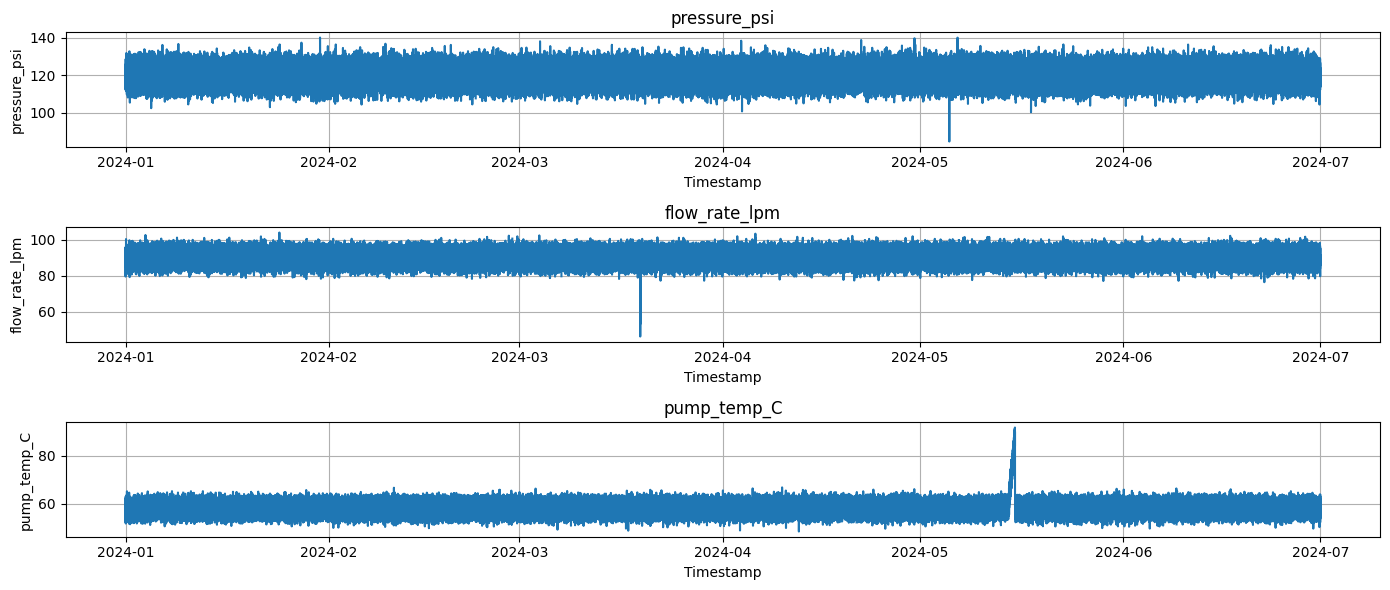

In [5]:
plot_time_series(df)

- Consistent Trends: All three sensors (pressure_psi, flow_rate_lpm, pump_temp_C) show stable trends over time with periodic minor fluctuations, indicating normal equipment operation.

- Anomalies Detected: Sharp drops in pressure_psi and flow_rate_lpm, and a sudden spike in pump_temp_C are observed, likely indicating short-term anomalies or sensor glitches.

- Long-term Stability: Despite brief anomalies, no major drifts or sustained deviations are seen, suggesting good long-term equipment stability.

### Distribution Plots

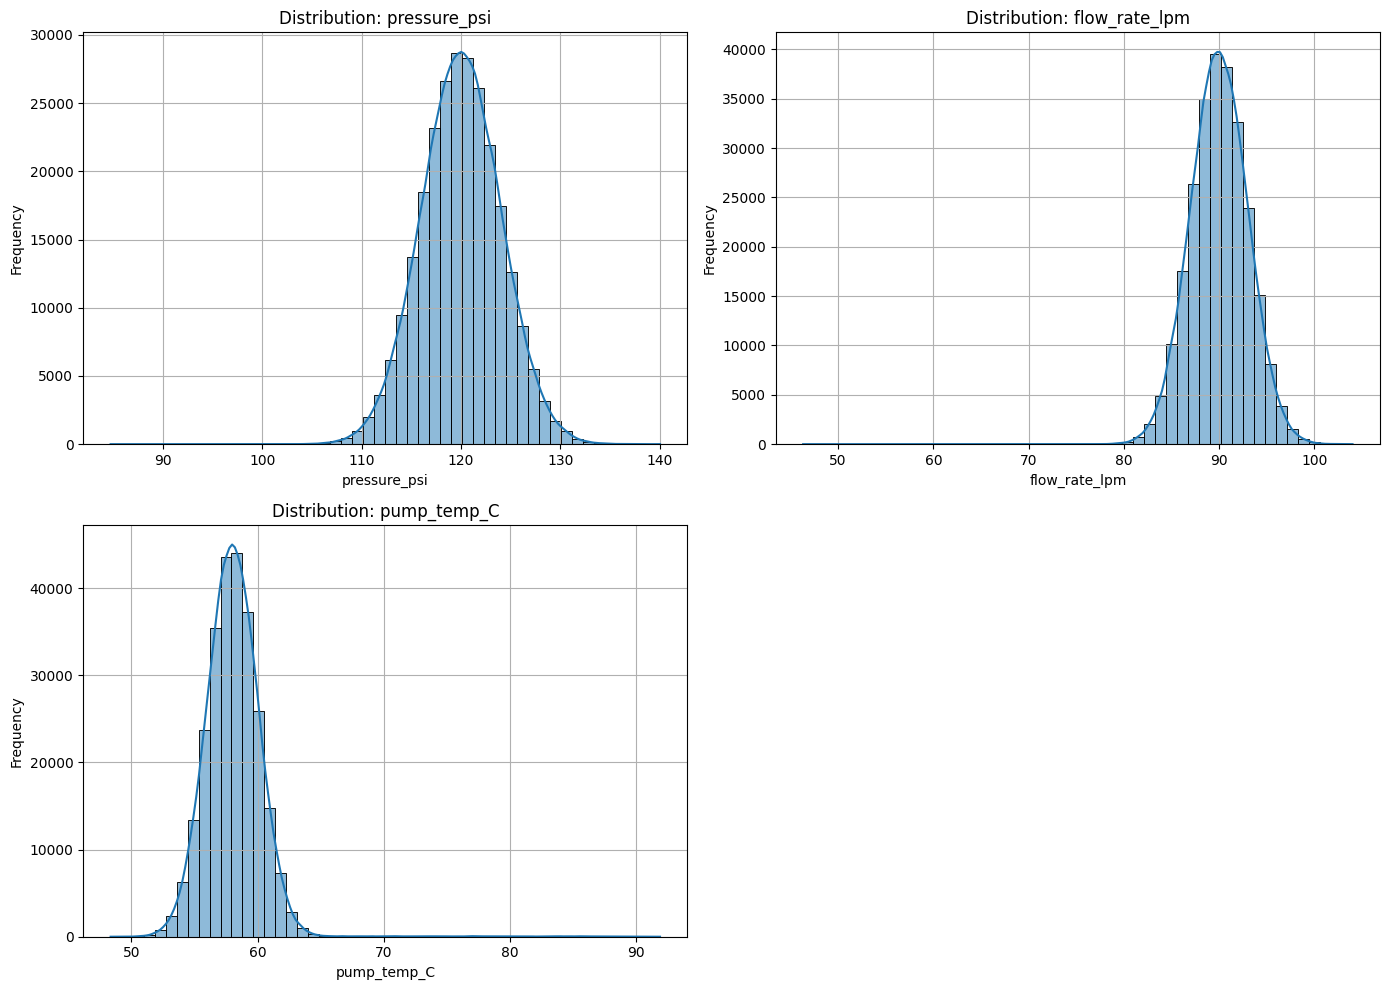

In [6]:
plot_histograms(df)

- Normal Distributions: All three sensor metrics (pressure_psi, flow_rate_lpm, and pump_temp_C) exhibit near-normal distributions, indicating consistent sensor behavior.

- Centering & Spread: The values are tightly centered around their respective means, suggesting low variance and high operational stability.

- Outlier-Free Tails: Minimal extreme values on either side indicate few outliers, supporting the reliability of collected data.

### Boxplots

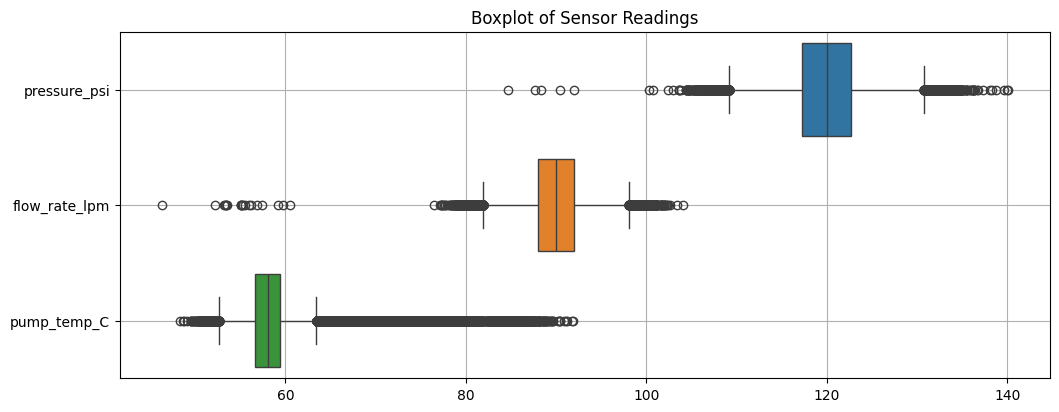

In [7]:
plot_boxplots(df)

- Presence of Outliers: All three sensors (pressure_psi, flow_rate_lpm, and pump_temp_C) show a noticeable number of outliers beyond the whiskers, indicating occasional abnormal readings or sensor noise.

- Stable Medians: The median values for each sensor are centrally located within their respective interquartile ranges, suggesting balanced distributions without skew.

- Tight IQRs: The interquartile ranges are narrow for all sensors, especially pump_temp_C, highlighting consistent readings with limited fluctuation during operations.

### Pairwise Relationships (scatter matrix)

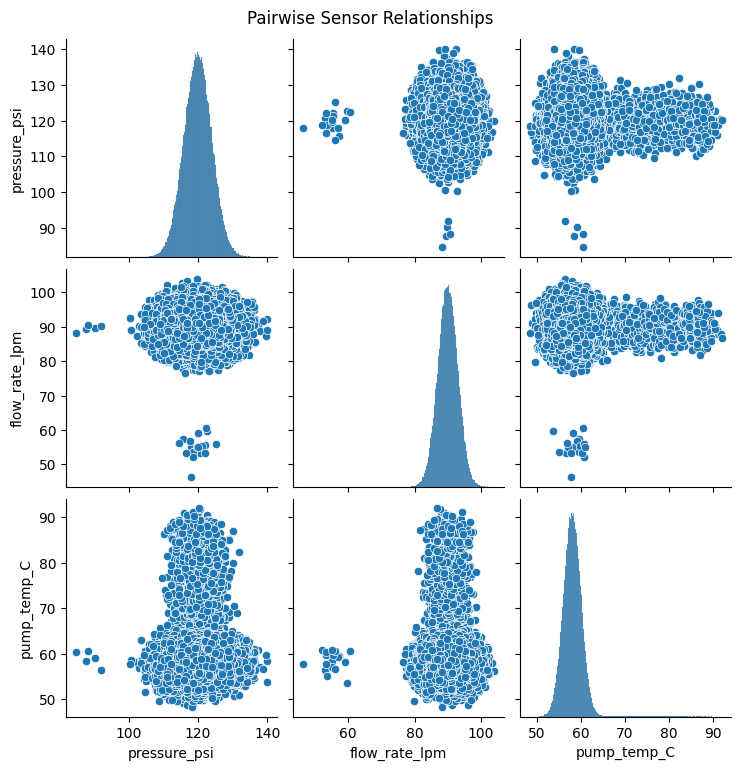

In [9]:
plot_pairwise_relationships(df)

- No Strong Inter‑Sensor Patterns: Scatterplots confirm negligible linear or nonlinear relationship among pressure_psi, flow_rate_lpm, and pump_temp_C, echoing the near‑zero correlation matrix.

- Distinct Outlier Clouds: Each pairwise plot shows small, well‑separated clusters (e.g., very low flow, very high temperature)

- Tight, Symmetric Histograms: Diagonal histograms are bell‑shaped and compact for all three sensors, reinforcing that the bulk of data stays within tight operating windows while deviations remain rare.

## Centrifugal Pump - Data Analysis

In [10]:
df = pd.read_csv("../data/centrifugal_pump.csv", parse_dates=["timestamp"])
df.head()

,timestamp,equipment_id,vibration_mmps,bearing_temp_C,motor_current_A
0,2024-01-01 00:00:00,Centrifugal Pump,3.121887,51.182144,59.205423
1,2024-01-01 00:01:00,Centrifugal Pump,2.584006,49.211903,59.432426
2,2024-01-01 00:02:00,Centrifugal Pump,3.300180,50.986015,65.027641
3,2024-01-01 00:03:00,Centrifugal Pump,3.376226,51.421813,57.021859
4,2024-01-01 00:04:00,Centrifugal Pump,2.219586,53.011263,55.398291


### Basic Summary

In [11]:
basic_summary(df)

###  Dataset Shape

,Metric,Value
0,Rows,262079
1,Columns,5


### Data Types & Missing Values

,Data Type,Non-Null Count,Missing Count,Missing (%)
timestamp,datetime64[ns],262079,0,0.00
equipment_id,object,262079,0,0.00
vibration_mmps,float64,260740,1339,0.51
bearing_temp_C,float64,260775,1304,0.50
motor_current_A,float64,260799,1280,0.49


### Descriptive Statistics (Numerical Columns Only)

,count,mean,std,min,25%,50%,75%,max,missing
vibration_mmps,260740.0,3.000,0.401,1.029,2.730,2.999,3.269,9.886,1339
bearing_temp_C,260775.0,52.151,2.836,42.976,50.666,52.014,53.384,95.174,1304
motor_current_A,260799.0,60.000,4.003,40.692,57.317,60.001,62.699,90.604,1280


### Basic Summary Insights – Mud Pump Data

-  **Dataset contains** `262,079` rows and `5` columns with sensor and timestamp data.
-  **Missing data** is minimal (~0.5%) across all 3 sensor columns:
      - `vibration_mmps` has 1,339 missing values (0.51%).
      - `bearing_temp_C` has 1,304 missing values (0.50%).
      - `motor_current_A` has 1,280 missing values (0.49%).
-  **Descriptive statistics** suggest:
      - `vibration_mmps` has a mean around `3.0 mm/s`, but spikes up to `~9.89 mm/s`, indicating rare but strong anomalies.
      - `bearing_temp_C` has a stable mean (`~52.15°C`) but a wide max (`95.17°C`), hinting at overheating events.
      - `motor_current_A` is centered around `60 A`, ranging between `40.7 A` and `90.6 A`, reflecting varied load conditions.

### Correlation Matrix

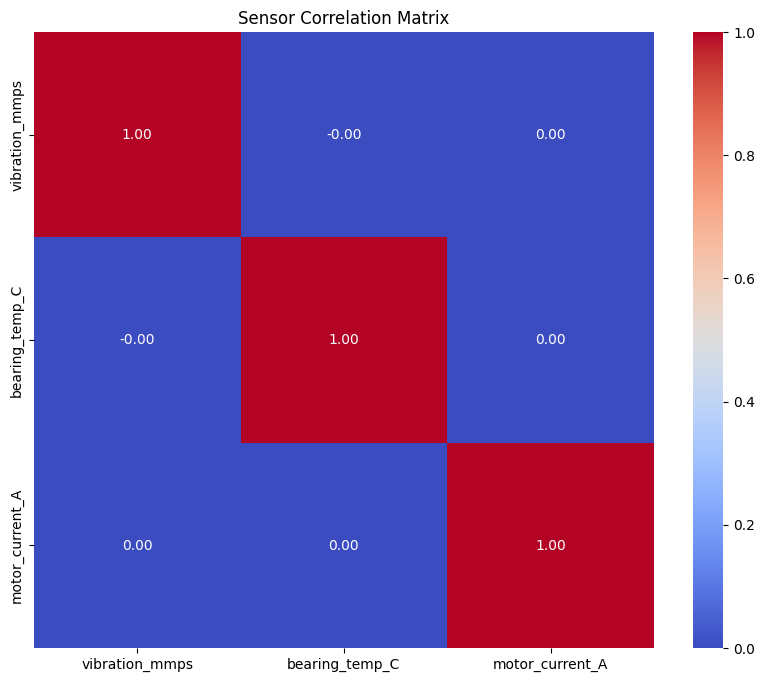

In [12]:
plot_correlation(df)

The sensor correlation matrix shows no significant correlation among vibration_mmps, bearing_temp, and motor_current_A, indicating each sensor operates independently.

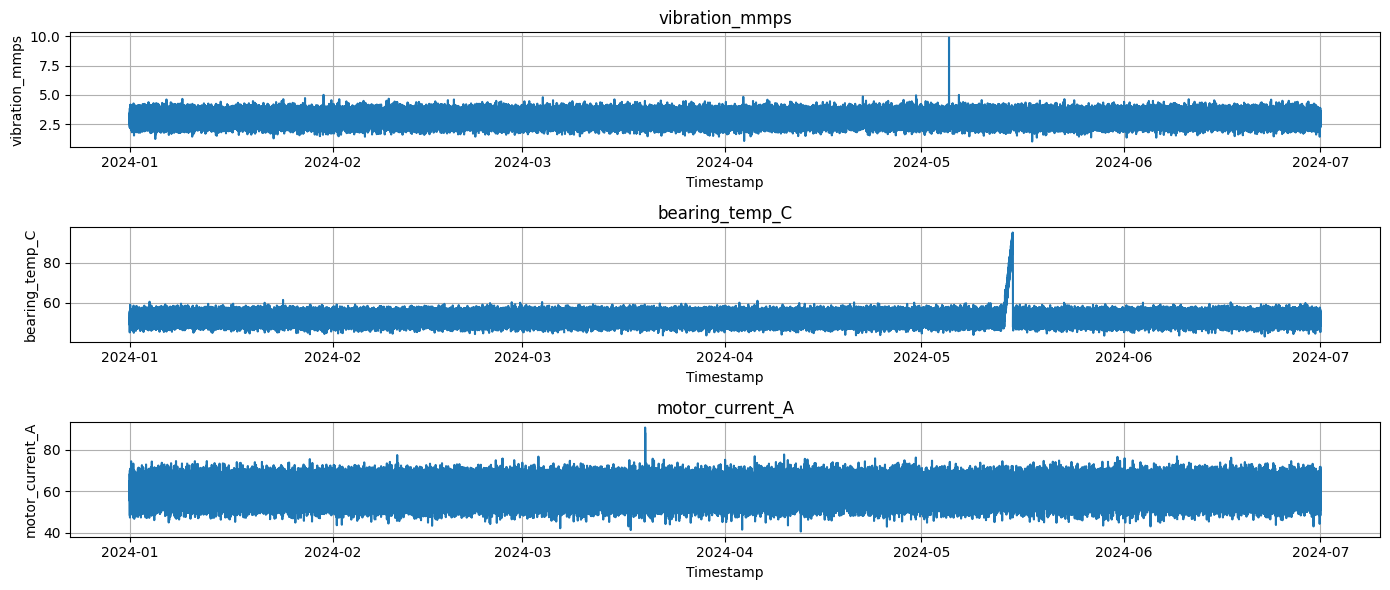

In [13]:
plot_time_series(df)

- Vibration spikes are observed in vibration_mmps around early May 2024, indicating potential mechanical anomalies or imbalance events.

- Bearing temperature (bearing_temp_C) shows a sudden surge during the same period, which could signal overheating or lubrication failure.

- Motor current (motor_current_A) remains generally stable but shows occasional dips and one sharp spike, possibly due to load fluctuations or power anomalies.

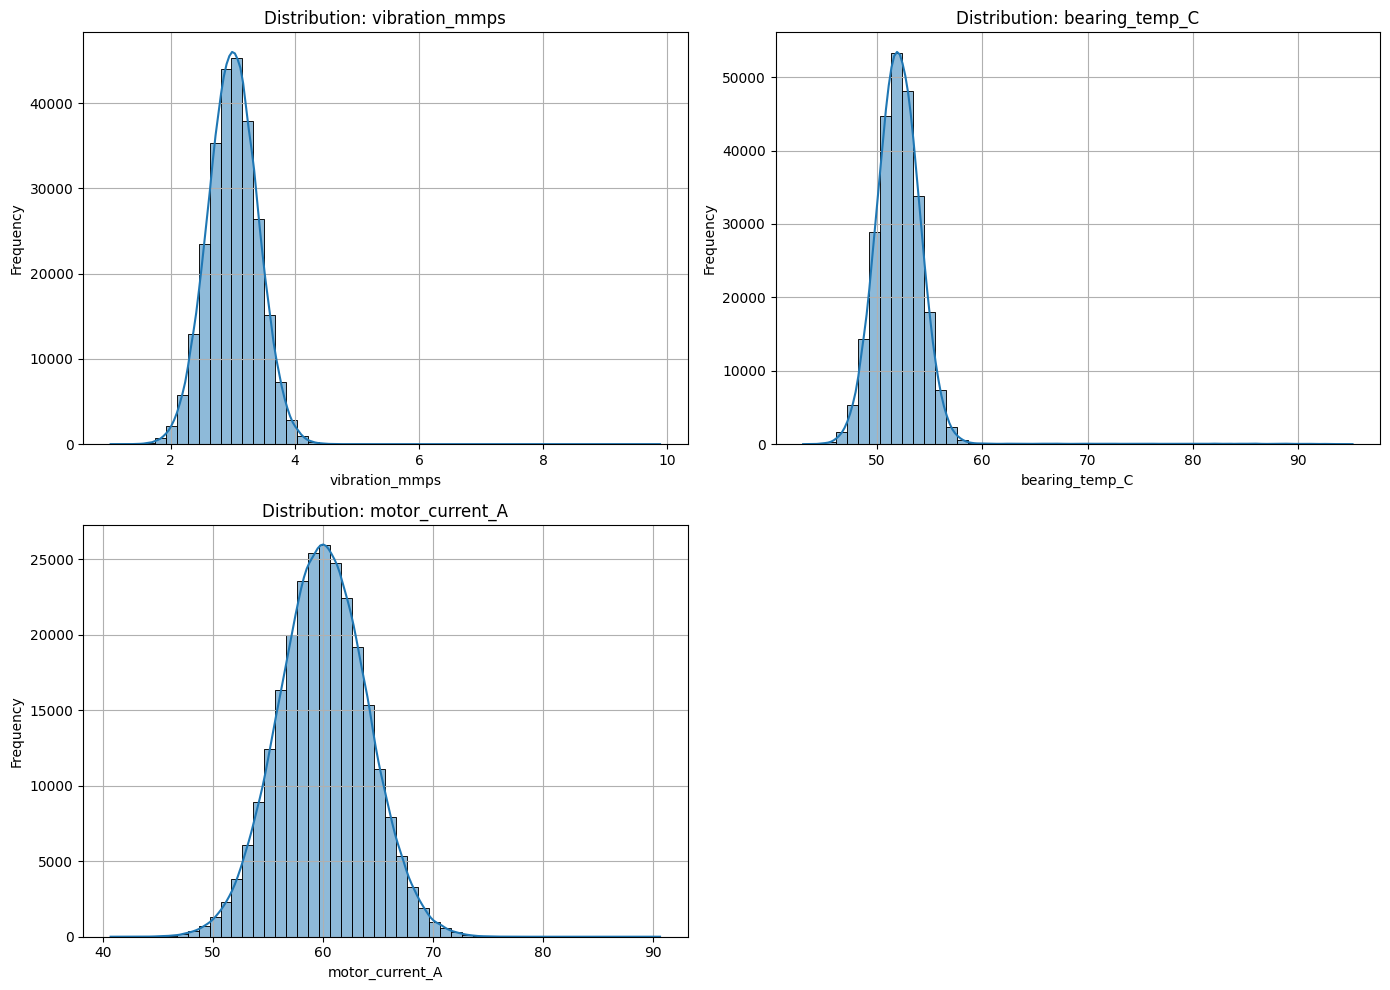

In [15]:
plot_histograms(df)

- Vibration (vibration_mmps) shows a right-skewed distribution with most values tightly clustered between 2.5–3.5 mm/s, but some outliers reaching up to ~10 mm/s.

- Bearing temperature (bearing_temp_C) is normally distributed around 52°C with a sharp peak, but has occasional extreme values indicating rare overheating events.

- Motor current (motor_current_A) displays a symmetric bell-shaped distribution centered around 60A, suggesting stable load behavior under normal operation.

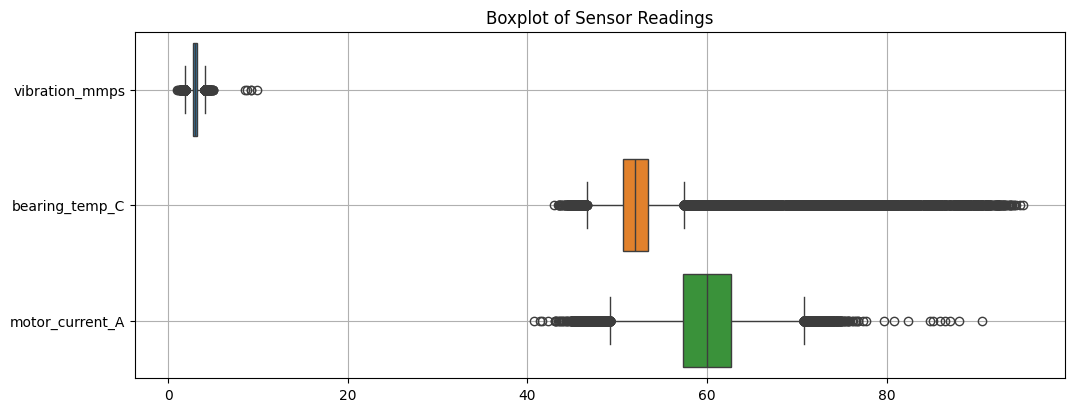

In [16]:
plot_boxplots(df)

- Vibration (vibration_mmps) has several high-value outliers, indicating occasional spikes that may signal abnormal mechanical conditions.

- Bearing temperature (bearing_temp_C) has a tight interquartile range (IQR), but many upper outliers suggesting overheating events that need monitoring.

- Motor current (motor_current_A) shows a symmetric distribution with a wide spread and outliers on both low and high ends, possibly due to fluctuating load or motor issues.

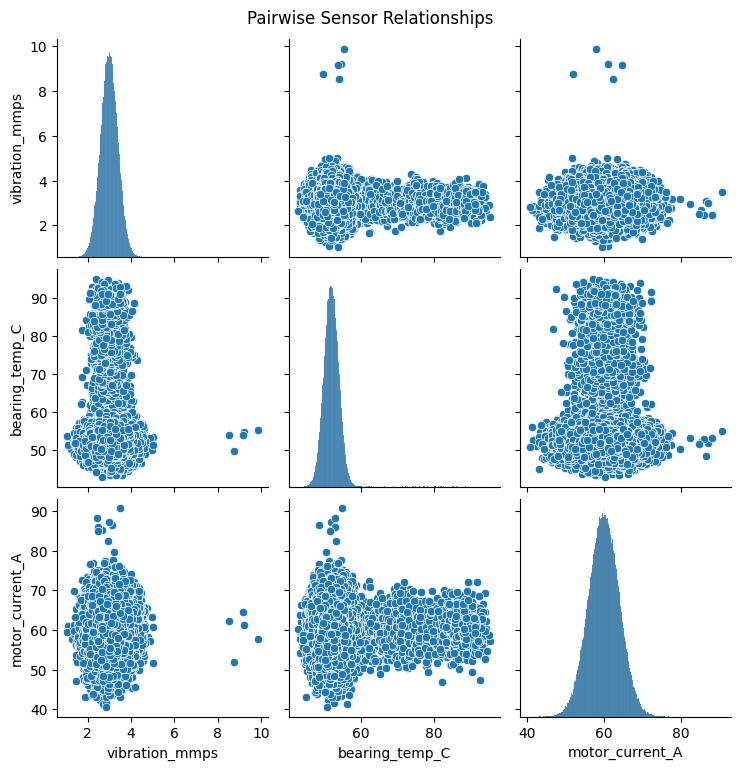

In [17]:
plot_pairwise_relationships(df)

- Weak correlations are observed between all sensor pairs (vibration, bearing temperature, motor current), indicating they operate largely independently under normal conditions.

- Outliers are evident in all pairwise scatter plots, especially in vibration_mmps and bearing_temp_C, suggesting occasional abnormal operational behavior.

- Data distributions along the diagonal are unimodal and slightly skewed, with vibration_mmps showing a sharper peak and motor_current_A being more symmetric.

## Blowout Preventer - Data Analysis

In [28]:
df = pd.read_csv("../data/blowout_preventer.csv", parse_dates=["timestamp"])
df.head()

,timestamp,equipment_id,hydraulic_pressure_psi,accumulator_pressure_psi
0,2024-01-01 00:00:00,Blowout Preventer,2518.283025,2987.732162
1,2024-01-01 00:01:00,Blowout Preventer,2437.600954,2958.178545
2,2024-01-01 00:02:00,Blowout Preventer,2545.027072,2984.790230
3,2024-01-01 00:03:00,Blowout Preventer,2556.433883,2991.327201
4,2024-01-01 00:04:00,Blowout Preventer,2382.937889,3015.168946


### Basic Summary

In [29]:
basic_summary(df)

###  Dataset Shape

,Metric,Value
0,Rows,262079
1,Columns,4


### Data Types & Missing Values

,Data Type,Non-Null Count,Missing Count,Missing (%)
timestamp,datetime64[ns],262079,0,0.0
equipment_id,object,262079,0,0.0
hydraulic_pressure_psi,float64,260774,1305,0.5
accumulator_pressure_psi,float64,260773,1306,0.5


### Descriptive Statistics (Numerical Columns Only)

,count,mean,std,min,25%,50%,75%,max,missing
hydraulic_pressure_psi,260774.0,2499.861,60.090,2204.306,2459.399,2499.805,2540.321,2800.434,1305
accumulator_pressure_psi,260773.0,2999.971,30.006,2864.646,2979.822,2999.929,3020.242,3140.191,1306


- Dataset contains 262,079 rows and 4 columns with sensor and timestamp data.
- Missing data is minimal (~0.5%) across both sensor columns:

    - hydraulic_pressure_psi has 1,305 missing values (0.50%).

    - accumulator_pressure_psi has 1,306 missing values (0.50%).

- Descriptive statistics :

    - hydraulic_pressure_psi has a mean around 2500 psi and ranges from ~2204 to 2800 psi, indicating normal operational pressure with occasional high spikes.

    - accumulator_pressure_psi is very stable, centered near 3000 psi with a narrow spread (±30 psi), but occasionally peaks at ~3140 psi, possibly during high-demand events.

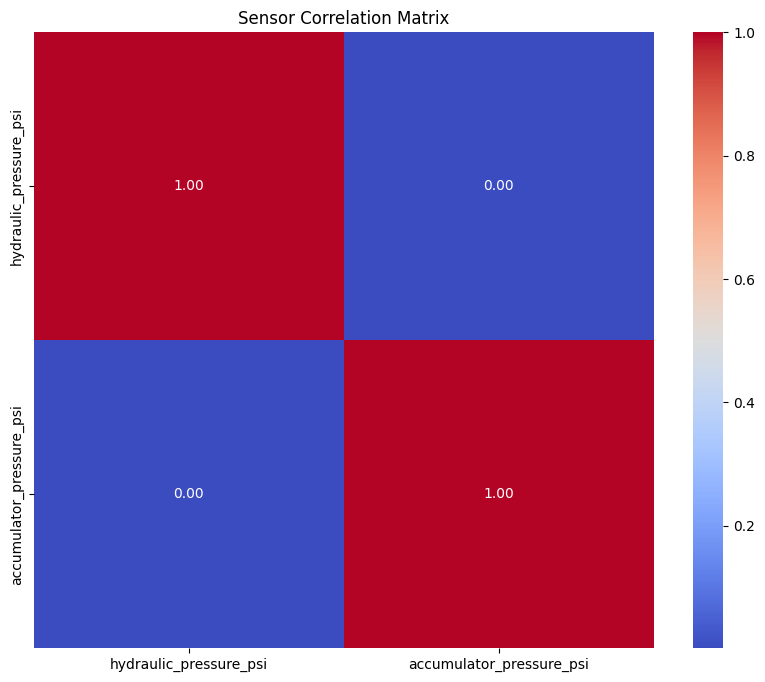

In [30]:
plot_correlation(df)

- No Strong Correlation Among Sensors: The correlation matrix shows near-zero correlation between hydraulic_pressure_psi and accumulator_pressure_psi, indicating these sensor readings behave independently of one another.

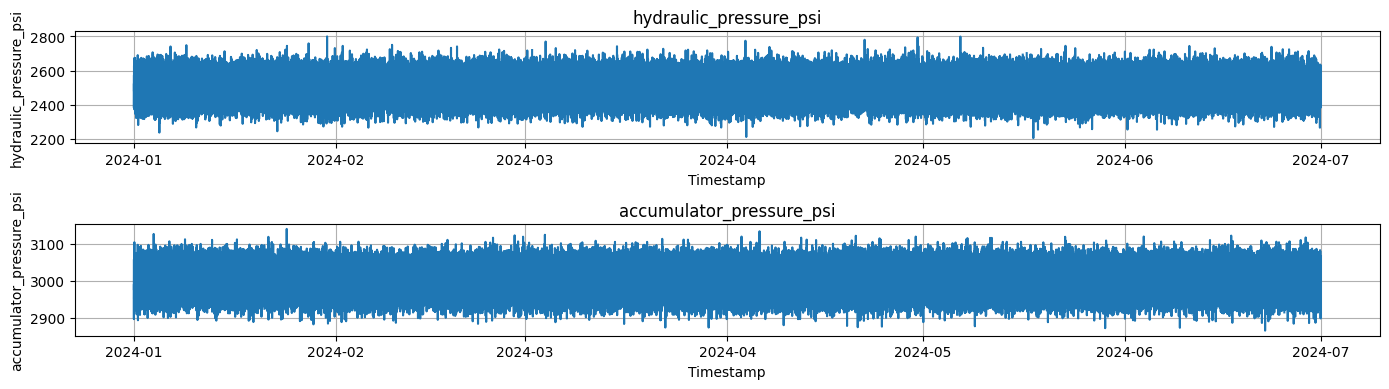

In [31]:
plot_time_series(df)

- Stable Pressure Trends Across Time: From January to July 2024, both hydraulic_pressure_psi and accumulator_pressure_psi exhibit consistent and stable readings without any sharp spikes or drops, indicating steady system performance with no visible anomalies or pressure-related failures.

- No Apparent Anomalies: The smooth patterns in both pressure readings suggest the system was functioning within expected limits during the entire time period, reflecting good control and operational stability.

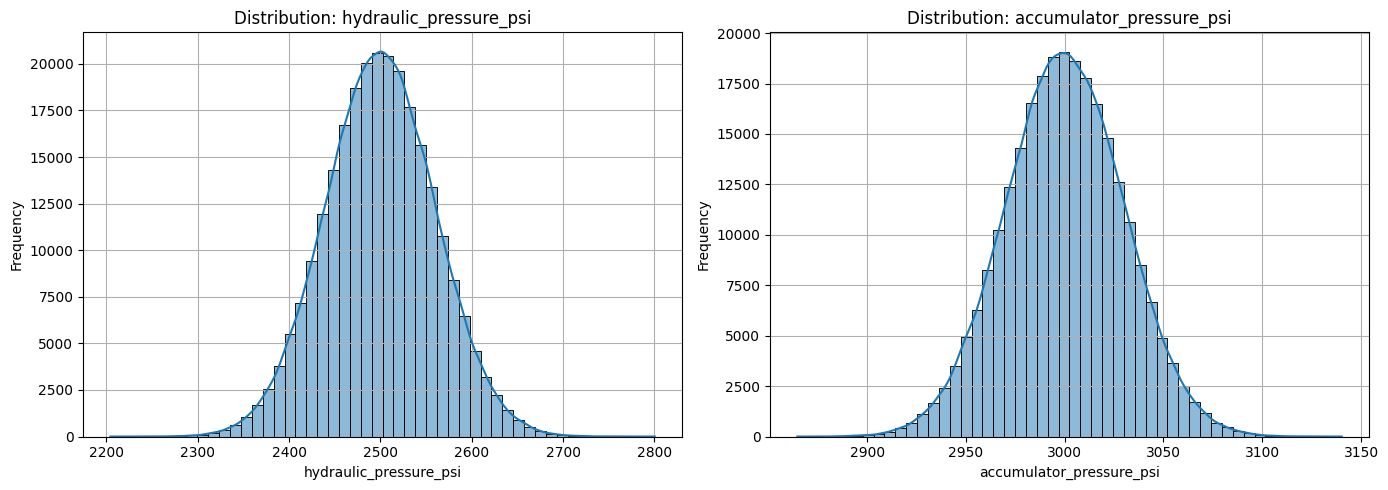

In [32]:
plot_histograms(df)

- Hydraulic Pressure Mostly Within Optimal Range: Most hydraulic_pressure_psi readings cluster between 2500–2700 psi, indicating the system generally operates in a stable and expected pressure range.

- Rare Deviations Detected: Occasional lower (2200–2400 psi) and upper (~2800 psi) readings suggest brief pressure anomalies, likely linked to system transitions like startup or shutdown.

- Accumulator Pressure Skewed High: accumulator_pressure_psi is heavily concentrated around 3000–3100 psi, hinting at consistently high-pressure conditions that may need review for calibration accuracy or over-pressurization risks.

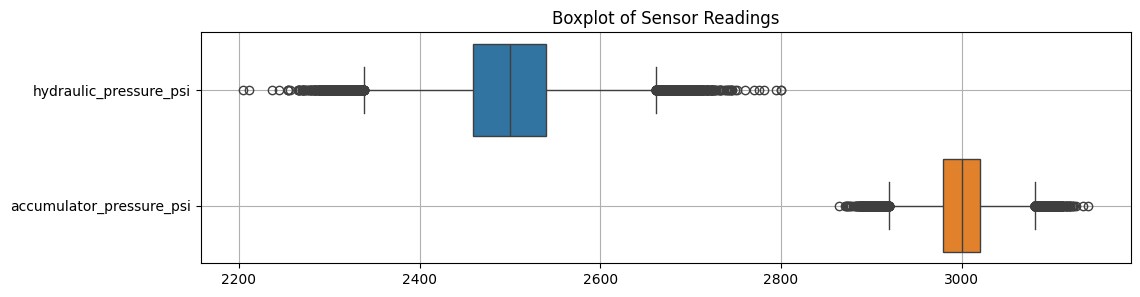

In [33]:
plot_boxplots(df)

- Significant Pressure Variability: Hydraulic and accumulator pressures show wide ranges (2200–2800 psi and up to 3000 psi), with broad interquartile spreads, indicating frequent pressure shifts likely driven by dynamic system operations.

- Potential Regulation Instability: The extent of pressure fluctuation may reflect system responsiveness but could also hint at irregularities in pressure control or load handling.

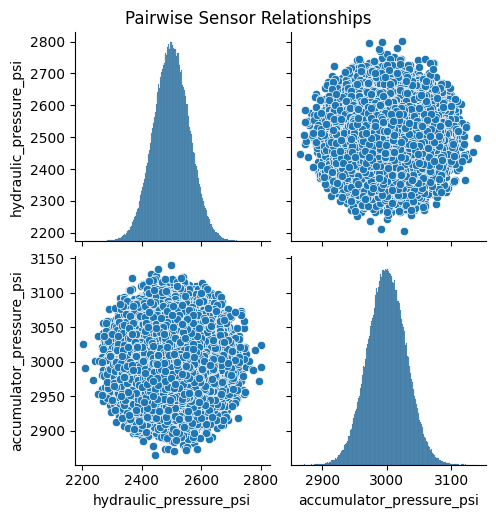

In [34]:
plot_pairwise_relationships(df)

- No clear correlation: The scatter plots between hydraulic_pressure_psi and accumulator_pressure_psi show circular patterns, suggesting little to no linear relationship between these two sensor readings.

- Normal distributions: Both sensor readings individually follow a roughly normal distribution, centered around ~2500 psi (hydraulic) and ~3000 psi (accumulator), indicating stable and consistent measurements.

## Shale Shaker - Data Analysis

In [35]:
df = pd.read_csv("../data/shale_shaker.csv", parse_dates=["timestamp"])
df.head()

,timestamp,equipment_id,vibration_rpm,motor_load_pct,throughput_lpm
0,2024-01-01 00:00:00,Shale Shaker,2012.188683,66.364288,348.013559
1,2024-01-01 00:01:00,Shale Shaker,1958.400636,62.423806,348.581066
2,2024-01-01 00:02:00,Shale Shaker,2030.018048,65.972031,362.569102
3,2024-01-01 00:03:00,Shale Shaker,2037.622589,66.843627,342.554647
4,2024-01-01 00:04:00,Shale Shaker,1921.958592,70.022526,338.495726


In [36]:
basic_summary(df)

###  Dataset Shape

,Metric,Value
0,Rows,262079
1,Columns,5


### Data Types & Missing Values

,Data Type,Non-Null Count,Missing Count,Missing (%)
timestamp,datetime64[ns],262079,0,0.00
equipment_id,object,262079,0,0.00
vibration_rpm,float64,260740,1339,0.51
motor_load_pct,float64,260775,1304,0.50
throughput_lpm,float64,260799,1280,0.49


### Descriptive Statistics (Numerical Columns Only)

,count,mean,std,min,25%,50%,75%,max,missing
vibration_rpm,260740.0,1999.986,40.144,1802.870,1973.001,1999.928,2026.945,2621.976,1339
motor_load_pct,260775.0,67.997,4.002,49.953,65.309,67.992,70.700,95.928,1304
throughput_lpm,260799.0,349.982,10.117,179.977,343.290,350.000,356.746,394.169,1280


- Data completeness: The dataset contains 262,079 rows and 5 columns, with minimal missing data (~0.5%) across the three numerical sensor metrics (vibration_rpm, motor_load_pct, and throughput_lpm), which is manageable for most analysis tasks.

- Sensor behavior:

    - vibration_rpm is tightly distributed around 2000 RPM with low variability, but some outliers reach as low as ~1800 and as high as ~2622 RPM, which may warrant inspection.

    - motor_load_pct has an average load of ~68%, with a relatively narrow spread and a maximum near 96%, possibly indicating occasional high-load conditions.

    - throughput_lpm centers around 350 LPM and also shows stable variation, but the minimum value (~180 LPM) could represent anomalies or low-flow conditions.

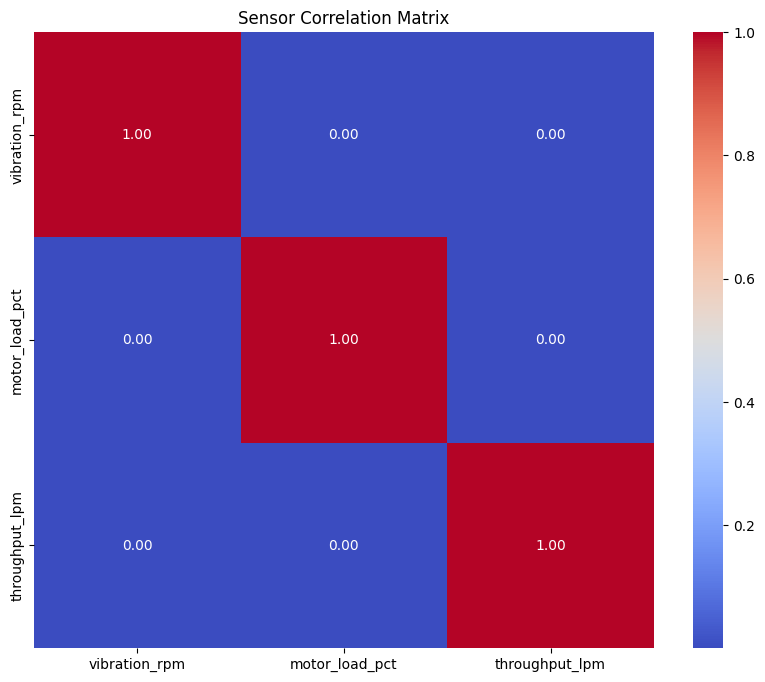

In [37]:
plot_correlation(df)

- No Strong Correlation Among Sensors: The correlation matrix shows near-zero correlation between vibration_rpm, motor_load_pct, and throughput_lpm, indicating these sensor readings behave independently of one another.

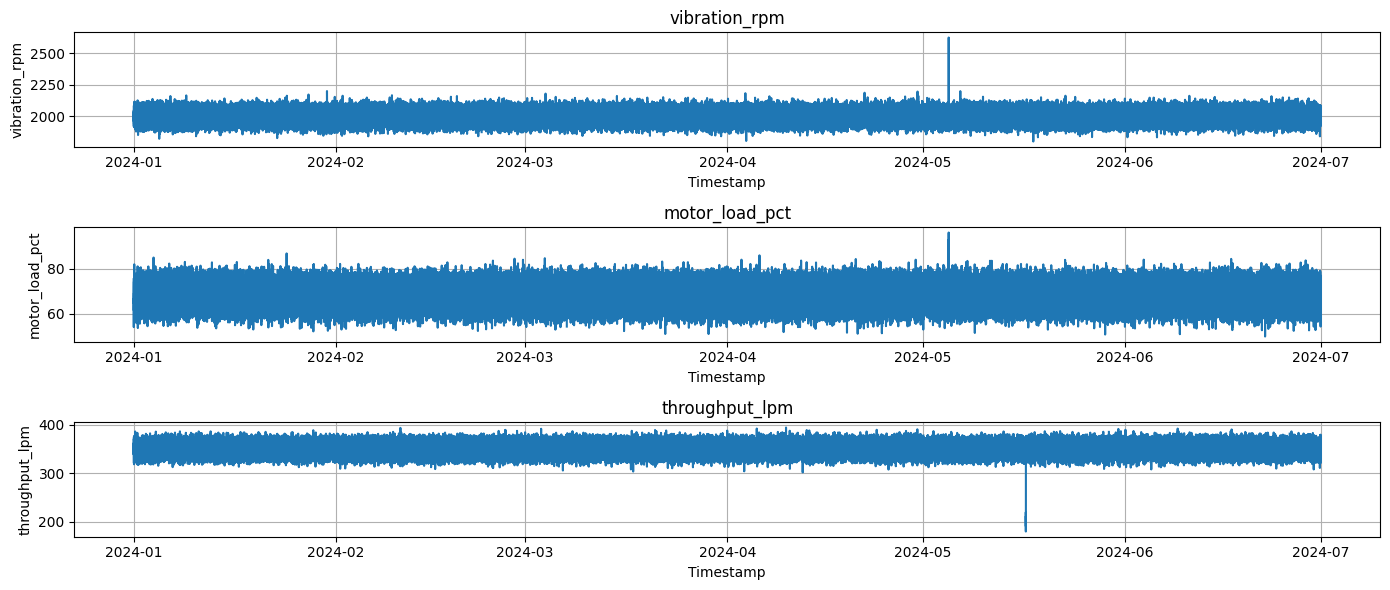

In [38]:
plot_time_series(df)

- Sudden anomalies around May 2024: All three metrics (vibration_rpm, motor_load_pct, and throughput_lpm) exhibit sharp spikes or dips around early May, suggesting a potential equipment anomaly or operational event.

- Overall sensor stability: Apart from the anomalies, the sensors show consistent patterns over time, indicating steady equipment performance across the 6-month monitoring period.

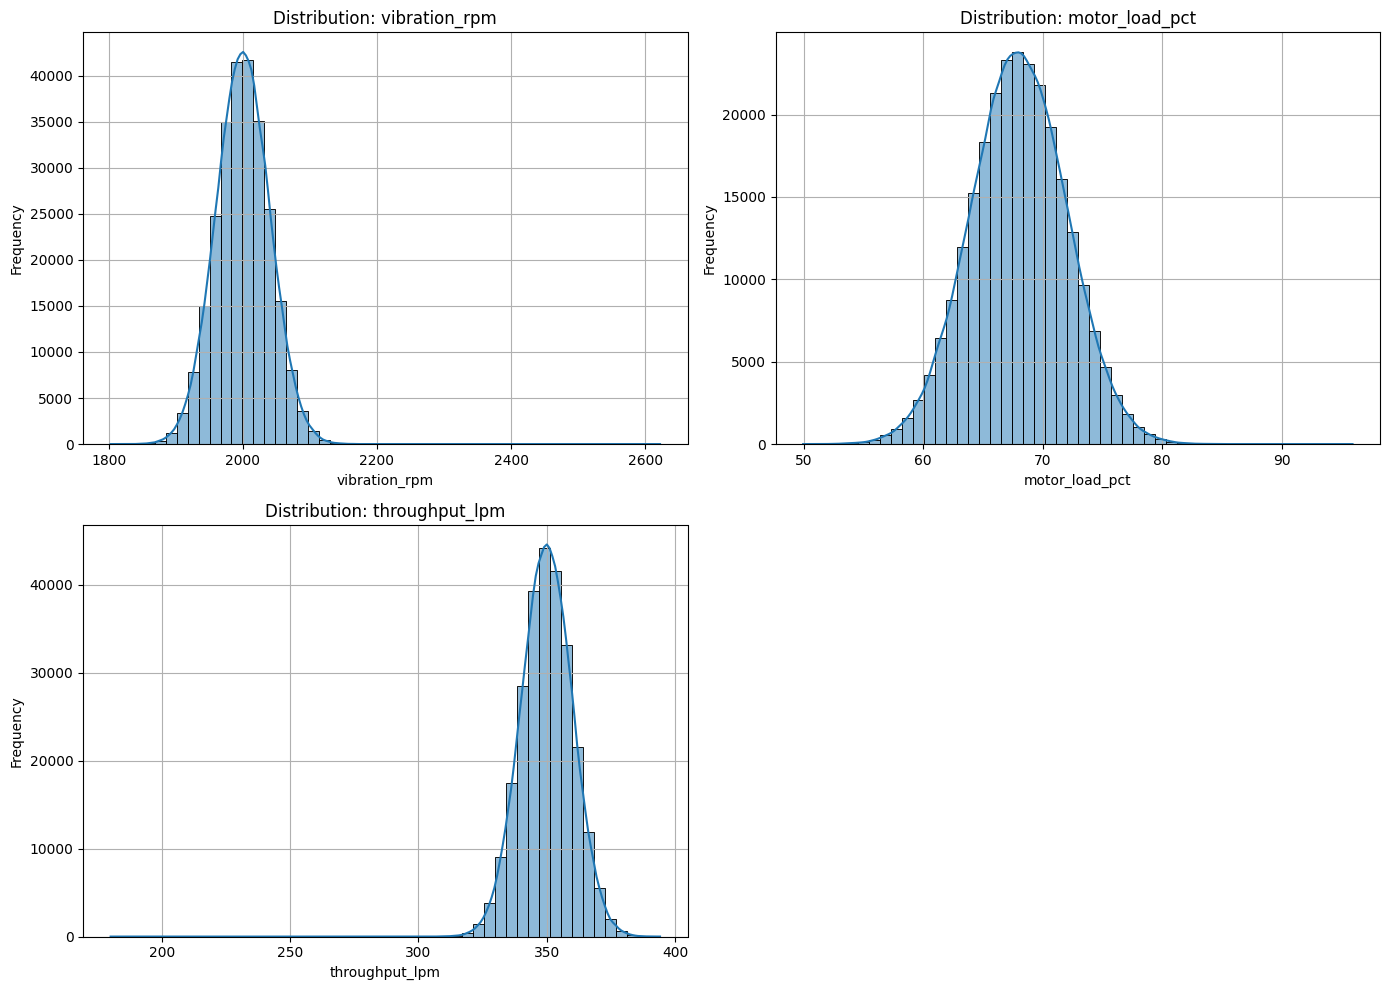

In [39]:
plot_histograms(df)

- All three metrics follow a normal distribution, indicating stable and predictable system behavior under normal operating conditions.

- Tight clustering around the mean is observed for each metric:

    - vibration_rpm around ~2000 RPM,

    - motor_load_pct around ~68%,

    - throughput_lpm around ~350 LPM — suggesting consistent operational control.

- Mild skew and outliers: While most data points cluster near the mean, each plot shows a few values at the extremes (e.g., very low throughput_lpm or high motor_load_pct), which may correspond to transient events or anomalies worth investigating.

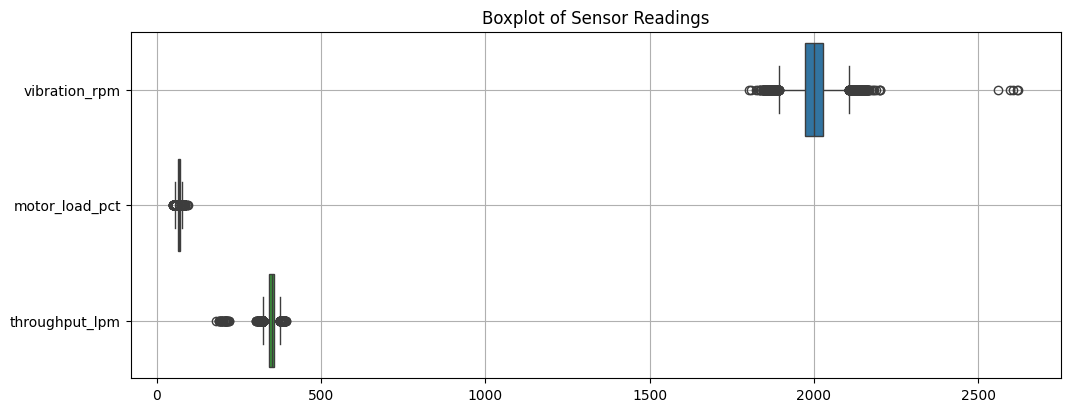

In [40]:
plot_boxplots(df)

- Presence of outliers: All three sensors (vibration_rpm, motor_load_pct, and throughput_lpm) exhibit outliers, particularly vibration_rpm, which shows multiple extreme high and low values beyond the whiskers.

- Tight interquartile range (IQR): Each sensor has a compact IQR, indicating that most data points are tightly clustered around the median—suggesting operational consistency during most of the monitoring period.

- Potential anomalies: The extreme outliers in vibration_rpm and throughput_lpm could indicate unusual machine behavior or sensor faults and should be further investigated for possible predictive maintenance triggers.

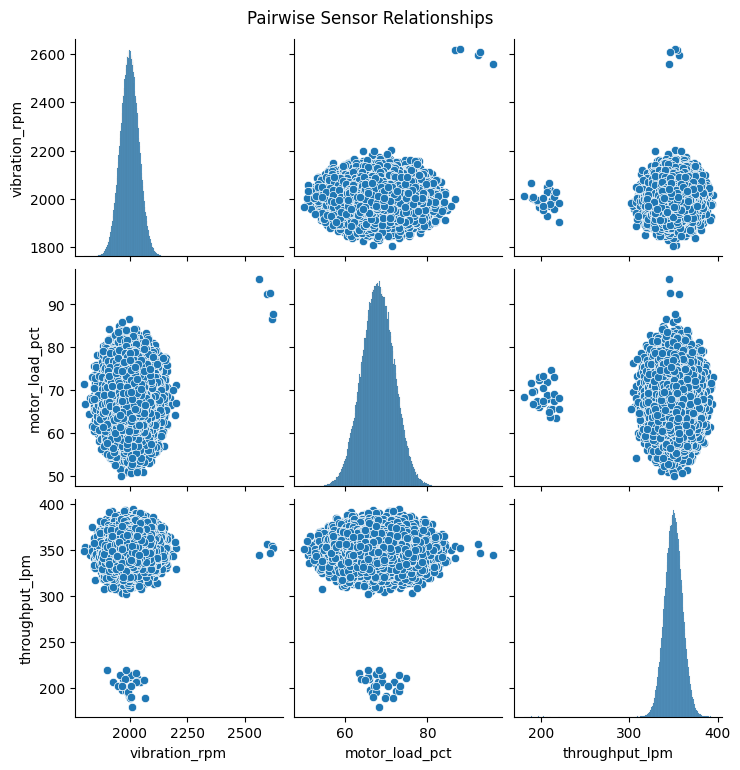

In [41]:
plot_pairwise_relationships(df)

- No strong linear correlations: The scatter plots between each sensor pair (vibration_rpm, motor_load_pct, throughput_lpm) show roughly circular or oval shapes, indicating weak or no linear relationship between the variables.

- Well-centered distributions: Each sensor’s histogram shows a clear bell-shaped curve, suggesting normally distributed values centered around their respective means.

- Presence of distinct outlier clusters: Some isolated data clusters are visible, especially in throughput_lpm and vibration_rpm, suggesting potential abnormal events or sensor issues that may require further inspection.

## Diesel Generator - Data Analysis

In [43]:
df = pd.read_csv("../data/diesel_generator.csv", parse_dates=["timestamp"])
df.head()

,timestamp,equipment_id,load_pct,engine_temp_C,fuel_level_pct,oil_pressure_psi
0,2024-01-01 00:00:00,Diesel Generator,71.523585,83.773216,89.996027,41.849060
1,2024-01-01 00:01:00,Diesel Generator,64.800079,80.817854,89.981027,43.215938
2,2024-01-01 00:02:00,Diesel Generator,73.752256,83.479023,89.966027,42.144312
3,2024-01-01 00:03:00,Diesel Generator,74.702824,84.132720,89.951027,42.301296
4,2024-01-01 00:04:00,Diesel Generator,60.244824,86.516895,89.936027,41.541505


In [44]:
basic_summary(df)

###  Dataset Shape

,Metric,Value
0,Rows,262079
1,Columns,6


### Data Types & Missing Values

,Data Type,Non-Null Count,Missing Count,Missing (%)
timestamp,datetime64[ns],262079,0,0.00
equipment_id,object,262079,0,0.00
load_pct,float64,260784,1295,0.49
engine_temp_C,float64,260716,1363,0.52
fuel_level_pct,float64,262079,0,0.00
oil_pressure_psi,float64,260802,1277,0.49


### Descriptive Statistics (Numerical Columns Only)

,count,mean,std,min,25%,50%,75%,max,missing
load_pct,260784.0,70.001,5.013,45.359,66.628,69.994,73.371,105.334,1295
engine_temp_C,260716.0,85.000,3.008,71.465,82.982,84.993,87.025,112.552,1363
fuel_level_pct,262079.0,-1875.595,1134.829,-3841.174,-2858.381,-1875.589,-892.796,89.996,0
oil_pressure_psi,260802.0,42.002,1.510,19.164,40.993,42.002,43.015,48.469,1277


- Sensor Metrics Overview
    - load_pct:

        - Average load is around 70%, with a reasonable spread.

        - A maximum of 105% may indicate a sensor error or overloading event.

    - engine_temp_C:

        - Centered around 85°C, with a healthy range of variation.

        - A max temperature of 112.5°C may suggest overheating in rare cases.

    - fuel_level_pct:

        - Highly suspicious values: The mean is –1875.6%, with a minimum of –3841% and a max of just 90%.

        - Indicates a likely sensor calibration issue or data corruption, since percentages should not be negative.

    - oil_pressure_psi:

        - Stable readings around 42 psi, with minimal deviation.

        - Minimum value of 19 psi may signal potential issues under certain conditions.

- Key Data Anomaly
    - The fuel_level_pct column is critically flawed, containing severely negative values, which are not physically valid and need to be either corrected or excluded before analysis.

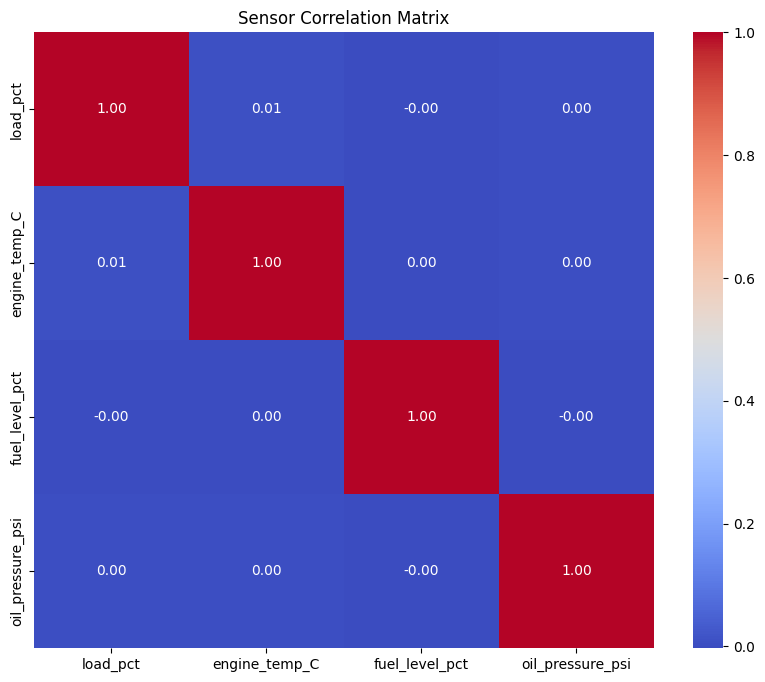

In [45]:
plot_correlation(df)

- The sensor correlation matrix shows no significant linear relationship between any pair of sensor readings, indicating they behave independently.

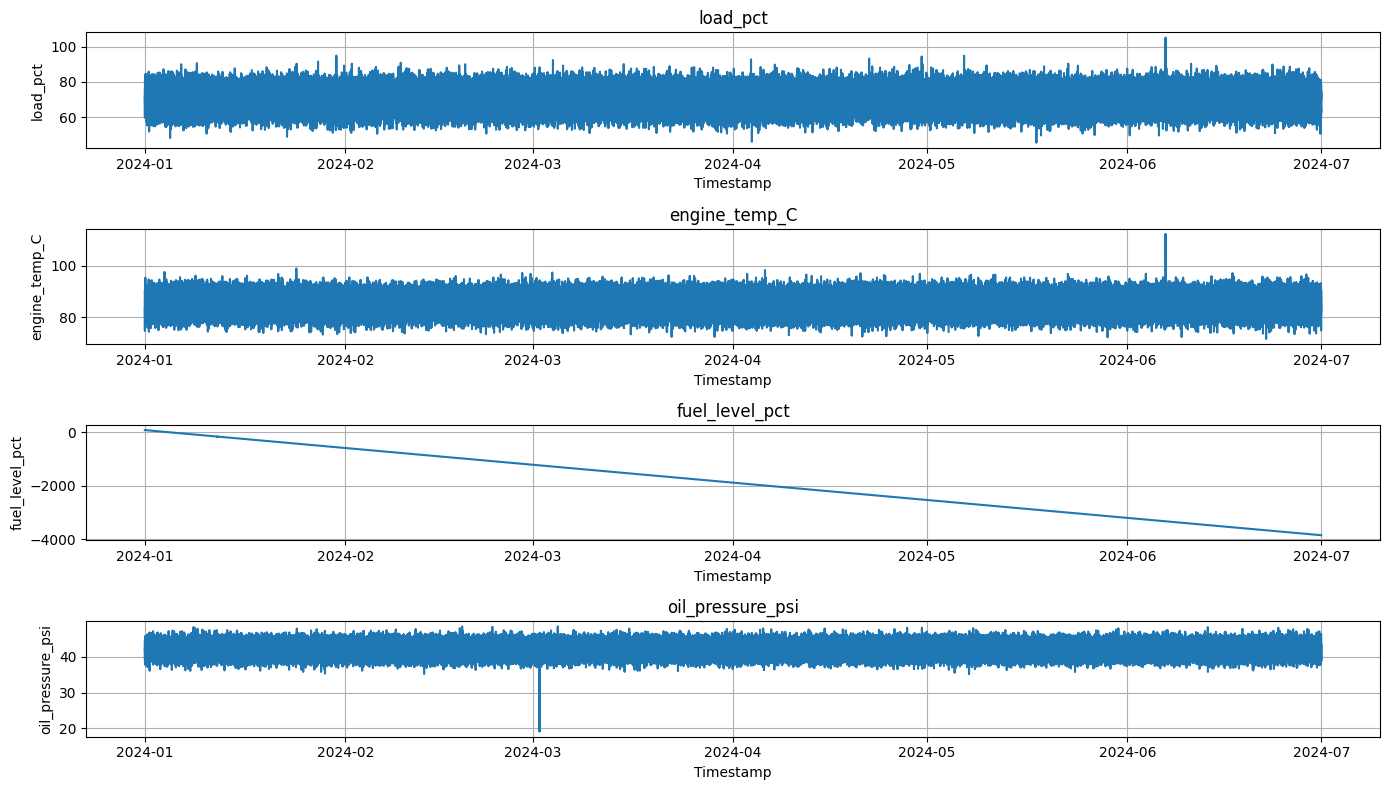

In [46]:
plot_time_series(df)

- Stable sensor behavior: load_pct, engine_temp_C, and oil_pressure_psi remain relatively stable over time with normal fluctuations, indicating consistent equipment operation.

- Isolated spikes: Sharp anomalies are visible in load_pct and engine_temp_C around mid-June, which may signal short-term overload or overheating events.

- Critical issue in fuel_level_pct: The fuel level shows an unrealistic, steady linear drop into highly negative values—confirming a sensor malfunction or data corruption.

- Brief pressure drop: oil_pressure_psi shows a sudden dip around early March, which might represent a momentary system fault or transient pressure loss.

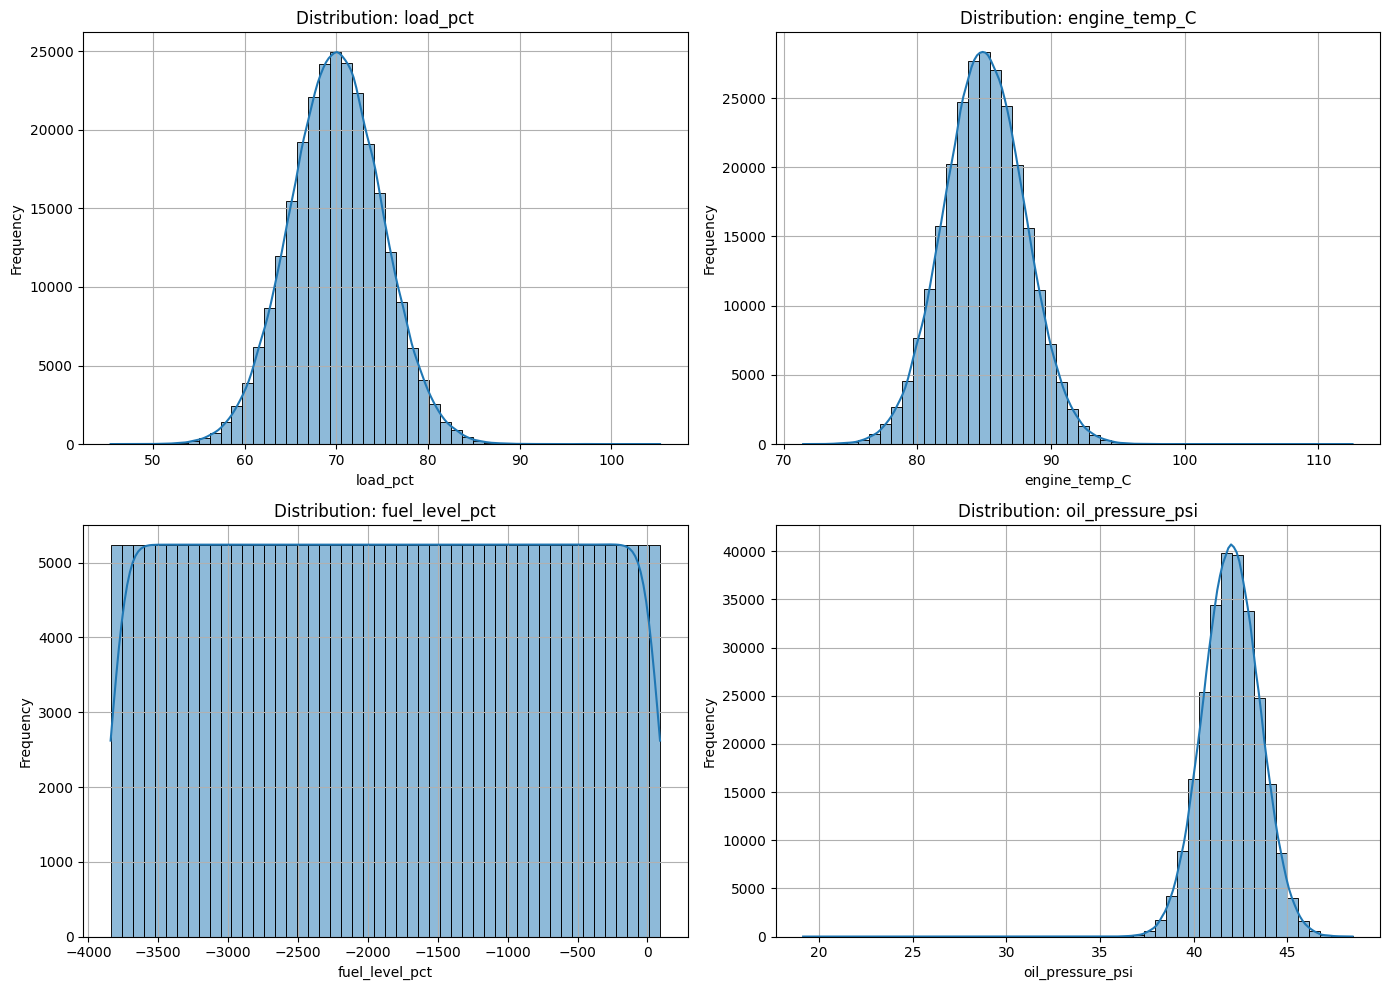

In [47]:
plot_histograms(df)

- Normal Distributions for Key Sensors:

    - load_pct, engine_temp_C, and oil_pressure_psi all exhibit bell-shaped, symmetric distributions, indicating stable and well-controlled equipment behavior under normal operations.

- Unrealistic fuel_level_pct Values:

    - The fuel_level_pct shows a highly abnormal flat distribution with values ranging from ~0 to –4000%, confirming a critical sensor malfunction or corrupt data. This field needs to be excluded or corrected before analysis.

- Mild Skew & Outliers:

    - load_pct and engine_temp_C distributions show slight skewness and extended tails, which may reflect rare high-load or high-temperature conditions, possibly tied to operational peaks.

- Reliable Oil Pressure Readings:

    - oil_pressure_psi distribution is tight around 42 psi, suggesting minimal fluctuations and consistent engine lubrication behavior.



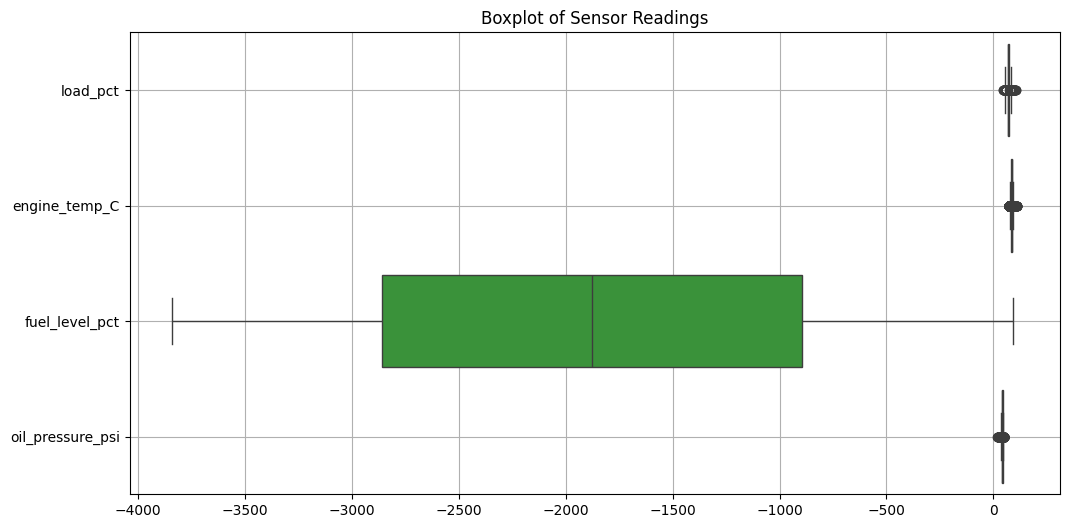

In [48]:
plot_boxplots(df)

- Severe anomaly in fuel_level_pct:

    - The fuel_level_pct has a massively negative range (–4000% to 0%), dominating the plot and confirming sensor failure or corrupted data.

    - This variable is not valid and should be cleaned or excluded from further analysis.

- Outliers in other sensors:

    - load_pct, engine_temp_C, and oil_pressure_psi all show minor outliers, but their interquartile ranges are tight and centered, indicating generally stable operation.
      

- Compression effect due to extreme fuel values:

    - The extreme scale of fuel_level_pct visually compresses the boxplots of the other sensors, making their distributions hard to compare — suggesting the need to plot them separately or normalize the data.

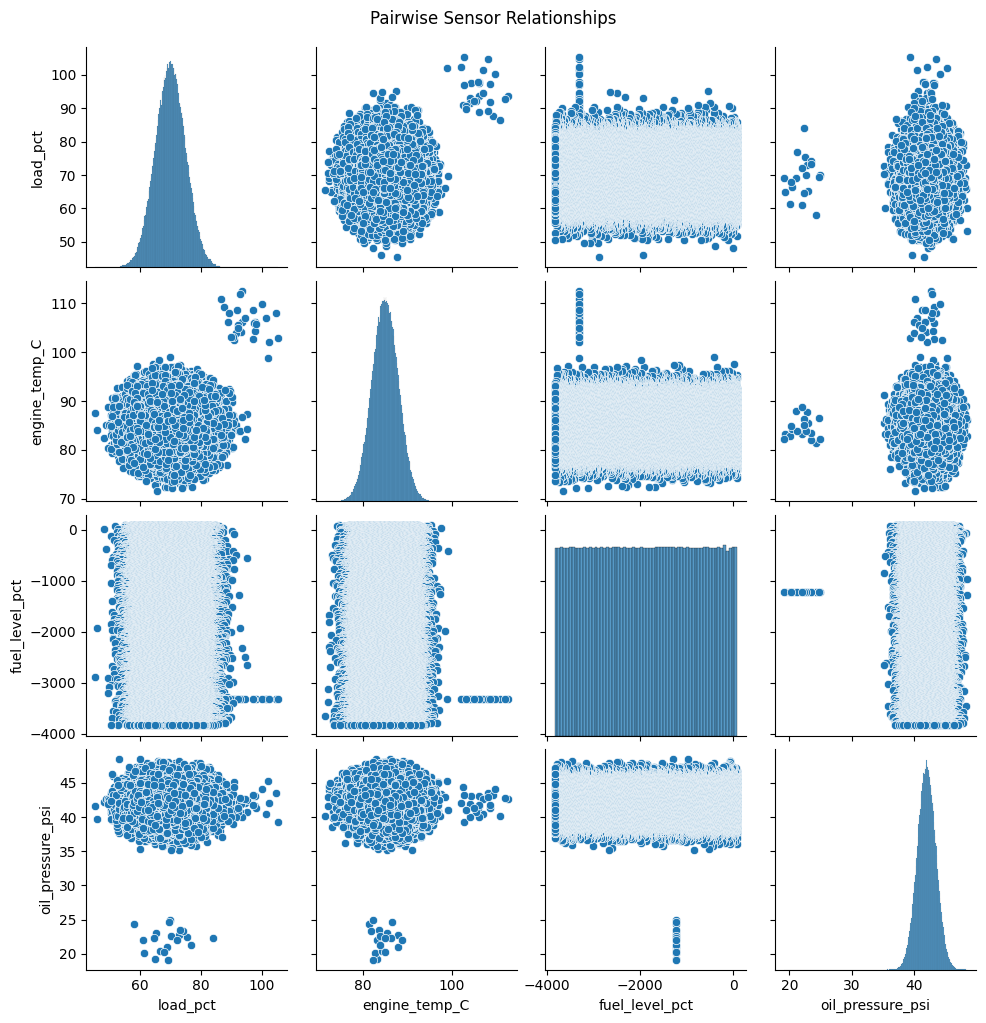

In [49]:
plot_pairwise_relationships(df)